In [1]:
# STEP 1: Install torch dan torchvision versi yang kompatibel (CUDA 11.8)
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

# STEP 2: Install PyTorch Geometric dan dependensinya (harus urut)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

# STEP 3: Install library tambahan yang dibutuhkan
!pip install timm pillow matplotlib h5py pandas networkx
!pip install numpy==1.26.4
!pip install numpy==1.26.4


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 525.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=67768b7a2e3d928bf3ec296b5d04fd047771faeb5234447e83a0edc981837a01
  Stored in directory: /root/.cache/pip/wheels/fc/5d/45/34fe9945d5e45e261134e72284395be36c2d4828af38e2b0fe
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.

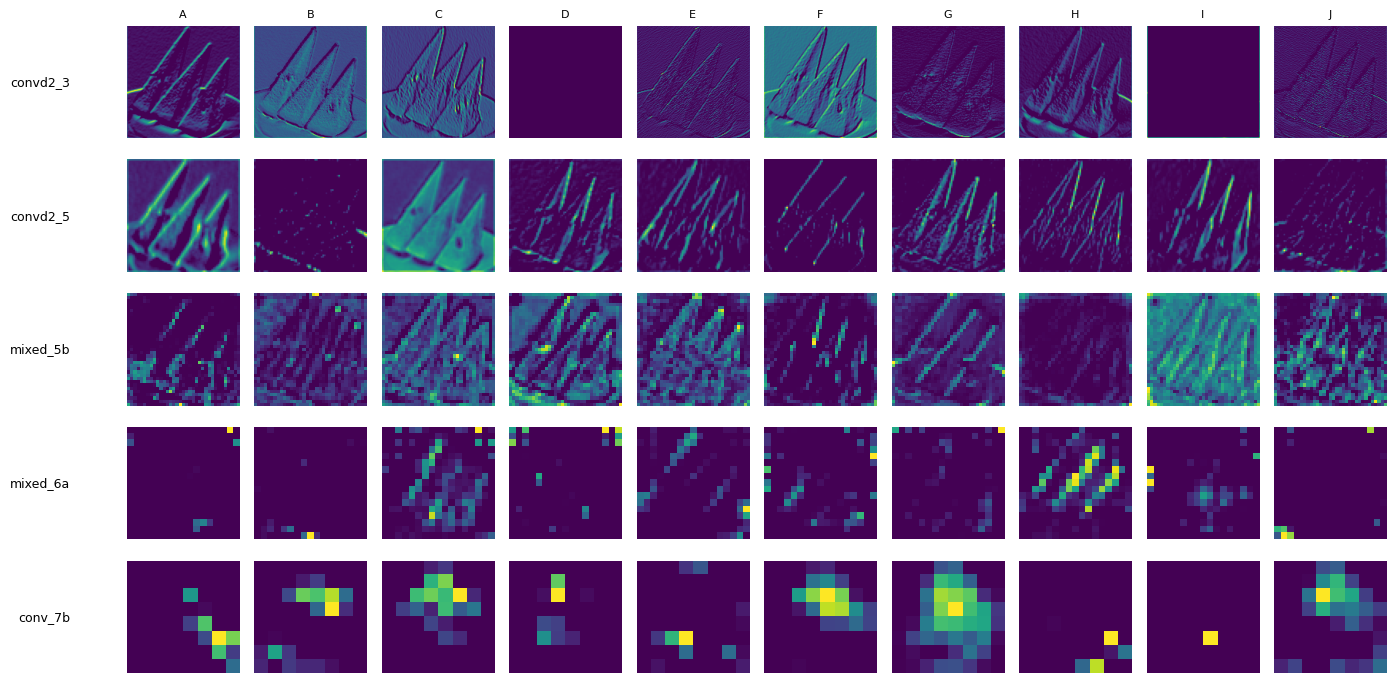

In [2]:
import torch
import timm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# Load model pre-trained dari TIMM
model = timm.create_model('inception_resnet_v2', pretrained=True, features_only=True)
model.eval()

# Load dan transform gambar
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor()
])

image_path = '7.jpg'  # Ganti sesuai lokasi gambar kamu
image = Image.open(image_path).convert('RGB')
input_tensor = transform(image).unsqueeze(0)

# Ekstraksi fitur dari beberapa layer
with torch.no_grad():
    features = model(input_tensor)

# Pilih layer yang ingin divisualisasikan
selected_layers = [0, 1, 2, 3, 4]
selected_features = [features[i][0] for i in selected_layers]

# Plot
fig, axs = plt.subplots(len(selected_layers), 10, figsize=(14, 7))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Label tiap layer untuk ditampilkan di kiri
layer_labels = [
    'convd2_3',
    'convd2_5',
    'mixed_5b',
    'mixed_6a',
    'conv_7b'
]

for row_idx, (feat, label) in enumerate(zip(selected_features, layer_labels)):
    channels_to_show = min(feat.shape[0], 10)
    for col_idx in range(10):
        axs[row_idx, col_idx].axis('off')
        if col_idx < channels_to_show:
            axs[row_idx, col_idx].imshow(feat[col_idx].cpu(), cmap='viridis')
            if row_idx == 0:
                axs[row_idx, col_idx].set_title(chr(65 + col_idx), fontsize=8)

    # Tambahkan label layer di sebelah kiri luar (di luar area plot)
    axs[row_idx, 0].text(-0.5, 0.5, label,
                         va='center', ha='right', fontsize=9, transform=axs[row_idx, 0].transAxes)


plt.tight_layout()
plt.savefig("visualisasi_fitur_map_label_kiri.png", dpi=300)
plt.show()


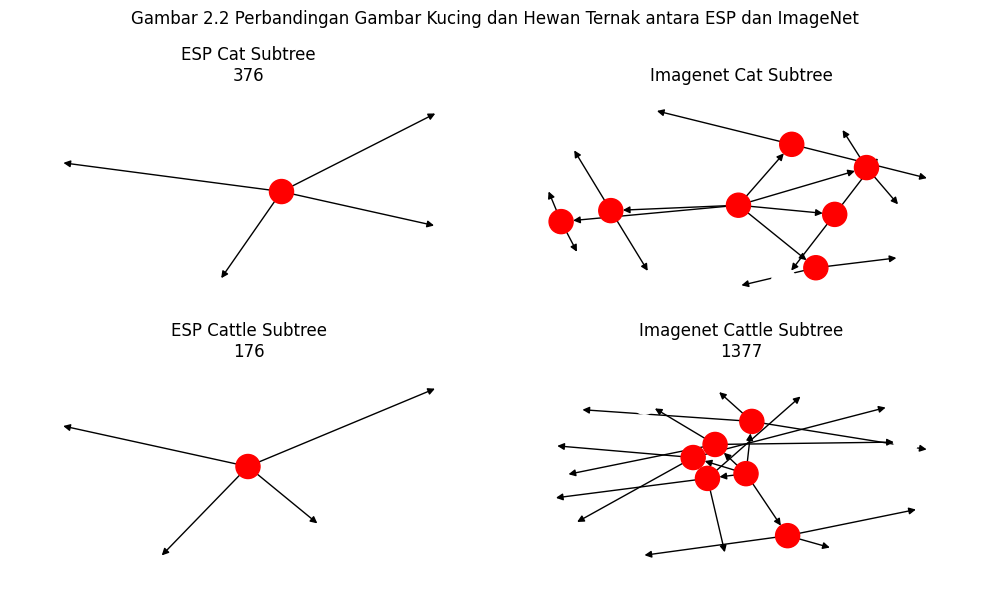

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def add_subtree(G, root, num_children, start_index, highlight=[]):
    nodes = []
    for i in range(num_children):
        node = f"{root}_{start_index + i}"
        G.add_edge(root, node)
        nodes.append(node)
    return nodes

def draw_tree(G, pos, ax, highlight_nodes=[], title=None):
    nx.draw(G, pos, ax=ax, with_labels=False, node_size=300,
            node_color=['red' if n in highlight_nodes else 'white' for n in G.nodes()],
            edge_color='black')
    ax.set_title(title)
    ax.axis('off')

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# ESP Cat Subtree
G1 = nx.DiGraph()
G1.add_node('ESP_CAT')
cat_nodes = add_subtree(G1, 'ESP_CAT', 4, 1, highlight=['ESP_CAT'])
pos1 = nx.spring_layout(G1, seed=1)
draw_tree(G1, pos1, axs[0, 0], highlight_nodes=['ESP_CAT'], title='ESP Cat Subtree\n376')

# ImageNet Cat Subtree
G2 = nx.DiGraph()
G2.add_node('IMG_CAT')
cat_level1 = add_subtree(G2, 'IMG_CAT', 6, 1)
for i, n in enumerate(cat_level1):
    add_subtree(G2, n, 2, i*2+1)
highlight2 = ['IMG_CAT'] + cat_level1
pos2 = nx.spring_layout(G2, seed=2)
draw_tree(G2, pos2, axs[0, 1], highlight_nodes=highlight2, title='Imagenet Cat Subtree')

# ESP Cattle Subtree
G3 = nx.DiGraph()
G3.add_node('ESP_CATTLE')
cattle_nodes = add_subtree(G3, 'ESP_CATTLE', 4, 1)
pos3 = nx.spring_layout(G3, seed=3)
draw_tree(G3, pos3, axs[1, 0], highlight_nodes=['ESP_CATTLE'], title='ESP Cattle Subtree\n176')

# ImageNet Cattle Subtree
G4 = nx.DiGraph()
G4.add_node('IMG_CATTLE')
cattle_level1 = add_subtree(G4, 'IMG_CATTLE', 5, 1)
for i, n in enumerate(cattle_level1):
    add_subtree(G4, n, 3, i*3+1)
highlight4 = ['IMG_CATTLE'] + cattle_level1
pos4 = nx.spring_layout(G4, seed=4)
draw_tree(G4, pos4, axs[1, 1], highlight_nodes=highlight4, title='Imagenet Cattle Subtree\n1377')

plt.suptitle("Gambar 2.2 Perbandingan Gambar Kucing dan Hewan Ternak antara ESP dan ImageNet")
plt.tight_layout()
plt.savefig("gambar_subtree_perbandingan.png", dpi=300)
plt.show()


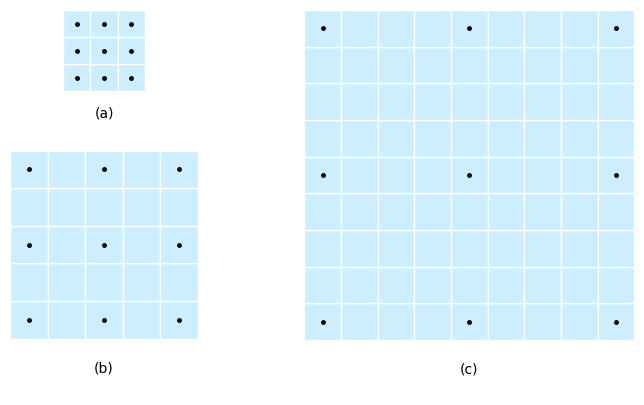

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def receptive_field(kernel_size, dilation):
    return (kernel_size - 1) * dilation + 1

def plot_kernel(ax, dilation, label, kernel_size=3):
    rf_size = receptive_field(kernel_size, dilation)
    grid_size = rf_size
    ax.set_xlim(0, grid_size)
    ax.set_ylim(-1.5, grid_size)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('white')

    # Gambar kotak biru (grid)
    for i in range(grid_size):
        for j in range(grid_size):
            rect = patches.Rectangle((i, j), 1, 1, facecolor='#cceeff', edgecolor='white')
            ax.add_patch(rect)

    # Titik kernel 3x3 dengan dilasi
    center = grid_size // 2
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            x = center + dx * dilation
            y = center + dy * dilation
            if 0 <= x < grid_size and 0 <= y < grid_size:
                ax.plot(x + 0.5, y + 0.5, 'k.', markersize=5)

     # Label bawah
    ax.text(grid_size / 2, -0.8, f"({label})", ha='center', va='center', fontsize=10)

# Buat layout bertingkat
fig = plt.figure(figsize=(9, 5))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 2], width_ratios=[1.2, 1.8], wspace=0.1, hspace=0.1)

# Subplot
ax1 = fig.add_subplot(gs[0, 0])  # (a): 3x3
ax2 = fig.add_subplot(gs[1, 0])  # (b): 7x7
ax3 = fig.add_subplot(gs[:, 1])  # (c): 15x15

# Gambar kernel sesuai dilasi
plot_kernel(ax1, dilation=1, label='a')  # 3x3
plot_kernel(ax2, dilation=2, label='b')  # 7x7
plot_kernel(ax3, dilation=4, label='c')  # 15x15


plt.savefig("gambar_kernel_dilatasi_fix.png", dpi=300, bbox_inches='tight')
plt.show()
